# House Price Prediction
<div style="text-align: center; width: 100%;">
    <img src="house-picture.png" style="max-width: 80%; height: auto;">
</div>

<p>When you ask someone to envision their ideal home, they rarely dive into details like basement ceiling height or the proximity to an east-west railroad. Yet, in the world of real estate, there's so much more to price negotiations than just the number of bedrooms or the presence of a white picket fence.<p/>
<p>With an arsenal of 79 explanatory variables that comprehensively cover nearly every aspect of residential homes in the picturesque town of Ames, Iowa, we're on a mission to equip home buyers with a powerful tool. This tool will enable them to forecast the ultimate price of their cherished dream home.<p/>

The Outline for this Notebook is:
- [Data Wrangling](#data-wrangling)
- Exploratory Data Analysis
- Data Preprocessing / Feature Engineering
- Model Training / Evaluation
- Model Prediction

*NOTE*: Each session might have multiple version, to demostract the iterative process used for achieving our final result.

This project is based on the Advance House Pricing competition on <img src="Kaggle_logo.png" width="35" height="15">.

The Ames Housing dataset was compiled by Dean De Cock for use in data science education, and can be found via: [link]("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")

<a name="data_wrangling"></a>
## Data Wrangling

#### Import required libaries

In [438]:
from IPython.display import display

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

### Data Gathering

In [439]:
df = pd.read_csv('train.csv')

In [440]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [441]:
df.shape

(1460, 81)

### Data Assessing

#### Preview the Dataset

In [442]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


#### Check for null

In [443]:

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Check for Duplicates

In [444]:
df.duplicated().sum()

0

### Data Cleaning

#### Drop columns with a large percentage of null (threshold:10%)

In [445]:
null_columns  = df.columns[df.isnull().sum() / df.shape[0] * 100 > 10]


In [446]:
null_columns

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [447]:
df.drop(null_columns, inplace=True,axis=1)

#### Fixed the remaining null value
- Fill numerical nulls with 0
- Drop rows with categorical nulls

In [448]:
#### Get a placeholder for the categorical and numerical variables
categorical_columns = df.columns[df.dtypes == 'object']
numerical_columns = df.columns[df.dtypes != 'object']

In [449]:
# Fill numerical null values with 0
df[numerical_columns] = df[numerical_columns].fillna(0)

# Drop rows with categorical null values
df.dropna(inplace=True)

In [450]:
pd.DataFrame(df.isnull().sum())

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0


<a name="eda"></a>
## Exploratory Data Analysis (EDA)
<p>EDA is a crutial part in the process of building any machine learning (ml) model. The key objective is to understand, identify patterns, and make initial insight on factors that influences house pricing from the data set provided to us by Ames.<p/>
<p>Our EDA would have several version depending on how well our model performs from


Text(0.5, 1.0, 'SalePrice Distribution')

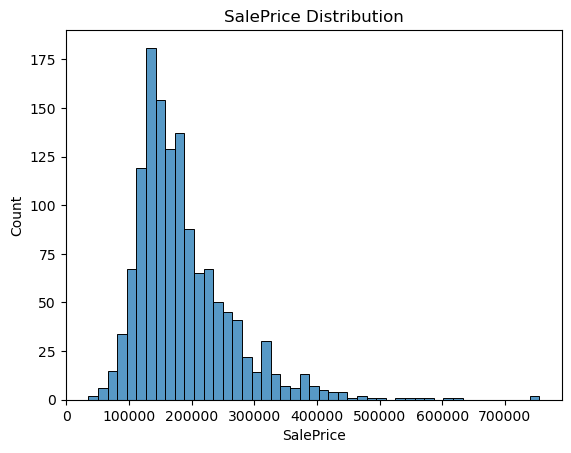

In [451]:
sns.histplot(df['SalePrice'])
plt.title('SalePrice Distribution')

In [452]:
for col in categorical_columns:
    print(col, '\n')
    print(df[col].unique(), '\n\n\n')

MSZoning 

['RL' 'RM' 'C (all)' 'FV' 'RH'] 



Street 

['Pave' 'Grvl'] 



LotShape 

['Reg' 'IR1' 'IR2' 'IR3'] 



LandContour 

['Lvl' 'Bnk' 'Low' 'HLS'] 



Utilities 

['AllPub' 'NoSeWa'] 



LotConfig 

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 



LandSlope 

['Gtl' 'Mod' 'Sev'] 



Neighborhood 

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 



Condition1 

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 



Condition2 

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 



BldgType 

['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs'] 



HouseStyle 

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 



RoofStyle 

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 



RoofMatl 

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Gr

In [453]:
df.shape

(1338, 75)

In [454]:
df.describe().round()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0
mean,731.0,56.0,10706.0,6.0,6.0,1973.0,1986.0,110.0,464.0,49.0,582.0,1096.0,1176.0,357.0,4.0,1538.0,0.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,1979.0,2.0,501.0,99.0,48.0,21.0,4.0,16.0,3.0,43.0,6.0,2008.0,186762.0
std,422.0,41.0,10337.0,1.0,1.0,30.0,20.0,186.0,459.0,166.0,440.0,406.0,387.0,440.0,41.0,521.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,25.0,1.0,187.0,128.0,65.0,61.0,30.0,58.0,42.0,508.0,3.0,1.0,78914.0
min,1.0,20.0,1300.0,2.0,2.0,1880.0,1950.0,0.0,0.0,0.0,0.0,105.0,438.0,0.0,0.0,438.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1900.0,1.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,35311.0
25%,366.0,20.0,7744.0,5.0,5.0,1956.0,1968.0,0.0,0.0,0.0,248.0,820.0,894.0,0.0,0.0,1160.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1962.0,1.0,378.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,135000.0
50%,730.0,50.0,9600.0,6.0,5.0,1976.0,1994.0,0.0,413.0,0.0,489.0,1022.0,1098.0,0.0,0.0,1480.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,484.0,6.0,28.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,168500.0
75%,1099.0,70.0,11761.0,7.0,6.0,2001.0,2004.0,174.0,733.0,0.0,816.0,1324.0,1414.0,740.0,0.0,1792.0,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,583.0,174.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,220000.0
max,1460.0,190.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,2.0,2.0,3.0,2.0,6.0,3.0,12.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


#### Explore Numerical Variables

C:\Users\emman\AppData\Local\Temp\ipykernel_5856\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

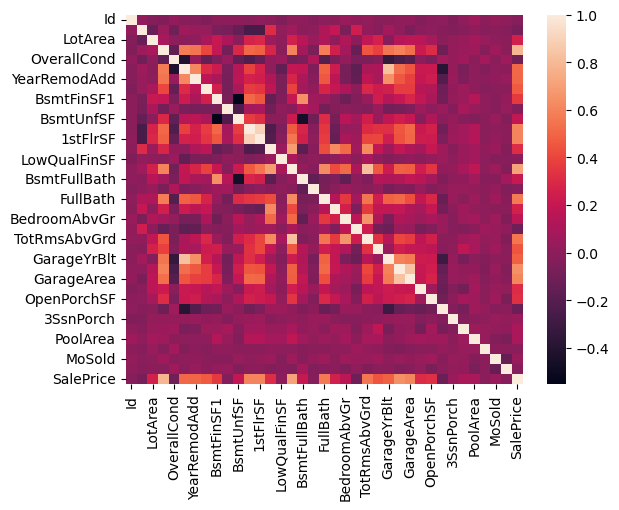

In [455]:
sns.heatmap(df.corr())

In [456]:
numerical_columns_h_corr = numerical_columns[abs(df.corr()['SalePrice']) > 0.15]

C:\Users\emman\AppData\Local\Temp\ipykernel_5856\873582301.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numerical_columns_h_corr = numerical_columns[abs(df.corr()['SalePrice']) > 0.15]


<Axes: >

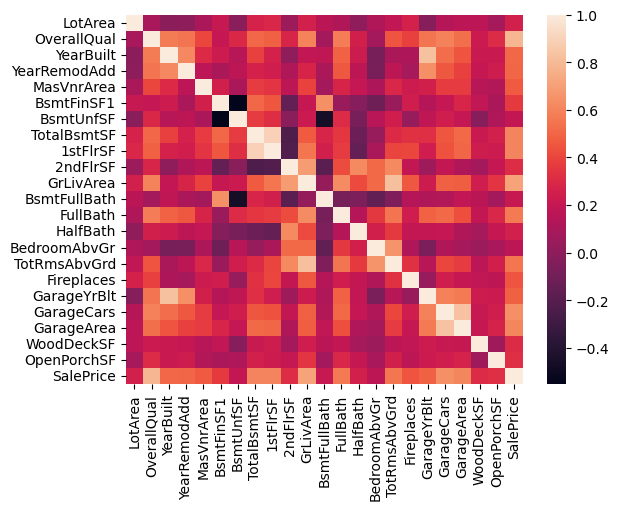

In [457]:
sns.heatmap(df[numerical_columns_h_corr].corr())

This is the numerical variable we would be using to build the model at the initial stage

#### Exploring Categorical Value

In [458]:
global_price = df['SalePrice'].mean()

In [459]:

for c in categorical_columns:
    df_group = df.groupby(c)['SalePrice'].agg(['mean']).round()
    df_group['diff'] = df_group['mean'] - global_price
    df_group['risk'] = df_group['mean'] / global_price
    print(df_group)
    print('\n')


#df[df['Street'] == 'Pave']['SalePrice'].mean()

              mean           diff      risk
MSZoning                                   
C (all)    78172.0 -108589.782511  0.418565
FV        214888.0   28126.217489  1.150599
RH        126539.0  -60222.782511  0.677542
RL        196480.0    9718.217489  1.052035
RM        131410.0  -55351.782511  0.703624


            mean          diff      risk
Street                                  
Grvl    132529.0 -54232.782511  0.709615
Pave    186965.0    203.217489  1.001088


              mean          diff      risk
LotShape                                  
IR1       210883.0  24121.217489  1.129155
IR2       241604.0  54842.217489  1.293648
IR3       216036.0  29274.217489  1.156746
Reg       170407.0 -16354.782511  0.912430


                 mean          diff      risk
LandContour                                  
Bnk          148605.0 -38156.782511  0.795693
HLS          236879.0  50117.217489  1.268348
Low          218988.0  32226.217489  1.172553
Lvl          185557.0  -1204.78251

In [460]:
df[df['Street'] == 'Grvl']['SalePrice'].mean()

132528.6

In [461]:
def mutual_info_saleprice_score(series):
    return mutual_info_score(df.SalePrice, series)

In [462]:
mutual_info = df[categorical_columns].apply(mutual_info_saleprice_score)
mutual_info.sort_values(ascending=False)

Neighborhood     2.015333
Exterior2nd      1.162497
Exterior1st      1.100788
BsmtFinType1     0.911147
HouseStyle       0.716750
BsmtQual         0.684606
KitchenQual      0.659433
GarageFinish     0.651138
BsmtExposure     0.600551
ExterQual        0.596121
HeatingQC        0.589507
Foundation       0.582943
GarageType       0.562383
MasVnrType       0.546764
LotConfig        0.486250
SaleCondition    0.459459
LotShape         0.454806
MSZoning         0.427639
SaleType         0.408362
Condition1       0.383454
RoofStyle        0.363343
BldgType         0.350578
BsmtFinType2     0.327424
LandContour      0.271962
ExterCond        0.214525
BsmtCond         0.207737
Functional       0.200011
Electrical       0.194643
GarageQual       0.168468
PavedDrive       0.155281
LandSlope        0.150223
GarageCond       0.133198
CentralAir       0.129299
RoofMatl         0.084173
Heating          0.060910
Condition2       0.057835
Street           0.021983
Utilities        0.004107
dtype: float

In [463]:
categorical_columns_h_corr = categorical_columns[df[categorical_columns].apply(mutual_info_saleprice_score) > 0.15]

#### Finalise columns for training the model

In [464]:
column_v1 = list(numerical_columns_h_corr) + list(categorical_columns_h_corr)

## Data Preprocessing / Feature Engineering

#### V1.0
For this version, we won't be engineering new features

In [465]:
full_train_df = df[column_v1]

In [466]:
train_df, val_df = train_test_split(full_train_df, test_size=0.2, random_state=42)

train_df.reset_index(inplace=True)
val_df.reset_index(inplace=True)

In [467]:
y_train = train_df.SalePrice
y_val = val_df.SalePrice

train_df.drop('SalePrice', inplace=True, axis=1)
val_df.drop('SalePrice', inplace=True, axis=1)

In [468]:
train_dict = train_df.to_dict(orient='records')
val_dict = val_df.to_dict(orient='records')

In [469]:
dv = DictVectorizer()

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

### V2.0
In this session, some new features will be engineered

In [470]:
full_train_df_1 = df[column_v1]

In [471]:
full_train_df_1.head(1)

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition
0,8450,7,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,208500,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal


In [472]:
full_train_df_1['age'] = 2023 - full_train_df_1['YearBuilt']

C:\Users\emman\AppData\Local\Temp\ipykernel_5856\497348222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_train_df_1['age'] = 2023 - full_train_df_1['YearBuilt']


In [473]:
train_df_1, val_df_1 = train_test_split(full_train_df_1, test_size=0.2, random_state=42)

train_df_1.reset_index(inplace=True)
val_df_1.reset_index(inplace=True)


y_train_1 = np.log1p(train_df_1.SalePrice)
y_val_1 = np.log1p(val_df_1.SalePrice)

train_df_1.drop('SalePrice', inplace=True, axis=1)
val_df_1.drop('SalePrice', inplace=True, axis=1)

train_dict_1 = train_df_1.to_dict(orient='records')
val_dict_1 = val_df_1.to_dict(orient='records')


dv = DictVectorizer()

X_train_1 = dv.fit_transform(train_dict_1)
X_val_1 = dv.transform(val_dict_1)

## Model Training / Evaluation

### V0.0
Model without feature selection

In [474]:
df_1 = df.copy()
dv_1 = DictVectorizer()

train_df_0, val_df_0 = train_test_split(df_1, test_size=0.2, random_state=42)


In [475]:
y = train_df_0.SalePrice

X = dv_1.fit_transform(train_df_0.drop('SalePrice', axis=1).to_dict(orient='records'))

In [476]:
model_0 = LinearRegression()
model_0.fit(X, y)

LinearRegression()

In [477]:
mean_squared_error(y, model_0.predict(X), squared=False)

25238.22742701358

### V1.0
Model with feature selection

#### Normal Linear Regression

In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [113]:
y_pred = model.predict(X_train)

array([328162.23621184, 191947.17524373, 121259.00477485, ...,
       237921.69143207, 210146.62200683, 241118.24499175])

In [114]:
mean_squared_error(y_train, y_pred, squared=False)

30141.80317911026

In [115]:

y_pred_val = model.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared=False)

29704.81010838057

#### Linear Regression With Normalization

In [142]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
result = {'alpha':[],'rmse_train':[],'rmse_val':[]}

for a in alpha:
    model = Ridge(alpha=a)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_pred, squared=False)
    y_pred_val = model.predict(X_val)
    rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
    result['alpha'].append(a)
    result['rmse_train'].append(rmse_train)
    result['rmse_val'].append(rmse_val)
result_df = pd.DataFrame(result)

In [144]:
result_df

,alpha,rmse_train,rmse_val
0,0.001,33286.223755,29693.094724
1,0.010,33286.223798,29692.764392
2,0.100,33286.227310,29689.363608
3,1.000,33286.573699,29655.876481
4,10.000,33316.855899,29369.497844
5,100.000,35430.025120,28952.597096
6,1000.000,39563.163324,31654.224435


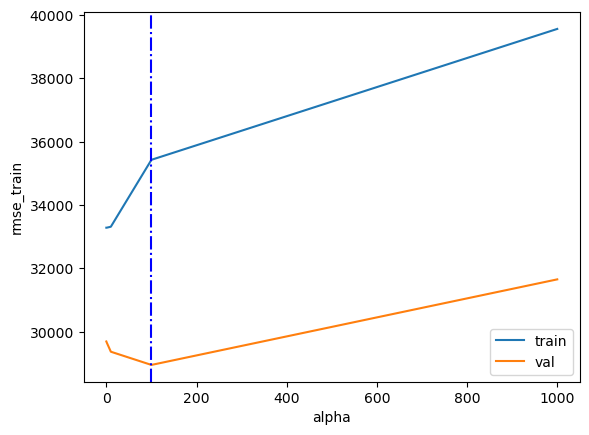

In [151]:
sns.lineplot(result_df, x='alpha', y='rmse_train', label='train')
sns.lineplot(result_df, x='alpha', y='rmse_val', label='val')
plt.axvline(x=100, color='blue', linestyle='-.')
plt.legend()

In [174]:
models_placeholder = [
    {   
        'model_name':'Decision Tree',
        'model': DecisionTreeRegressor(),
        'param_grid': {'max_depth': [1, 2, 3, 4, 5, 6, 10, 15, 20, None], 'random_state': [42],
                        'min_samples_leaf':[1, 2, 5, 10, 15, 20, 100, 200, 500]}
    },

    {
        'model_name':'Random Forest',
        'model': RandomForestRegressor(),
        'param_grid': {'max_depth': [1, 2, 3, 4, 5, 6, 10, 15, 20, None], 'random_state': [42],
                       'min_samples_leaf':[1, 2, 5, 10, 15, 20, 100, 200, 500],
                        'n_estimators':[1, 2, 5, 7, 9, 10, 13, 15, 20, 50, 100 ],
                        'n_jobs' : [4]}
    },


    {
        'model_name':'XGBoost',
        'model': XGBRegressor(),
        'param_grid': {'max_depth': [1, 2, 3, 4, 5, 6, 10, 15, 20, None], 'seed': [42],
                        'n_estimators': [100, 200, 300],
                        'learning_rate': [0.3, 1, 0.1, 0.01, 0.05],
                        'nthread': [6]}
    }

]

In [175]:
result = {'model_name': [],
          'model_object' : [],
          'best_model' : [],
          'mean_score' : []}

best_model = None
best_score = -float('inf')

for model_dict in models_placeholder:
    model_name = model_dict['model_name']
    print(model_name)
    model = model_dict['model']
    parameters = model_dict['param_grid']
    clf = GridSearchCV(model, parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
    clf.fit(X_train, y_train)
    mean_score = np.mean(clf.cv_results_['mean_test_score'])
    result['model_name'].append(model_name)
    result['model_object'].append(clf)
    result['best_model'].append(clf.best_estimator_)
    result['mean_score'].append(-float(mean_score))

    if mean_score > best_score:
        best_model = clf.best_estimator_
        best_score = mean_score

print(f'Best Model: {type(best_model).__name__}')
print(f'Best Mean Squared Error: {best_score}')

Decision Tree
Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ...max_depth=1, min_samples_leaf=1, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=2, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=2, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=2, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=2, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=2, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=5, random_state=42; total time=   0.0s
[CV] END ...max_depth=1, min_samp

In [176]:
result

{'model_name': ['Decision Tree', 'Random Forest', 'XGBoost'],
 'model_object': [GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
               param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 10, 15, 20, None],
                           'min_samples_leaf': [1, 2, 5, 10, 15, 20, 100, 200,
                                                500],
                           'random_state': [42]},
               scoring='neg_root_mean_squared_error', verbose=2),
  GridSearchCV(cv=5, estimator=RandomForestRegressor(),
               param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 10, 15, 20, None],
                           'min_samples_leaf': [1, 2, 5, 10, 15, 20, 100, 200,
                                                500],
                           'n_estimators': [1, 2, 5, 7, 9, 10, 13, 15, 20, 50,
                                            100],
                           'n_jobs': [4], 'random_state': [42]},
               scoring='neg_root_mean_squared_error', verbose=2),
  GridSearch

In [177]:

mean_squared_error(y_val, best_model.predict(X_val), squared=False)

26105.158783142822

In [267]:
xgbm = RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=50,
                        n_jobs=4, random_state=42)
xgbm.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=50,
                      n_jobs=4, random_state=42)

In [268]:
mean_squared_error(y_train, xgbm.predict(X_train), squared=False)

16461.411477548794

In [269]:
mean_squared_error(y_val, xgbm.predict(X_val), squared=False)

28021.357218366975

### V2.0
Training on best model using data with feature engineering

In [478]:
model_1 = XGBRegressor(learning_rate=0.05, max_depth=4, n_estimators=300, nthread=6, seed=42)
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_train_1)
train_rmse =  mean_squared_error(y_train_1, y_pred_1, squared=False)
y_pred_val_1 = model_1.predict(X_val_1)
val_rmse =  mean_squared_error(y_val_1, y_pred_val_1, squared=False)

print(f'The rsme of the model on the training dataset is {np.expm1(train_rmse)}, while on the val dataset is {np.expm1(val_rmse)}.')

The rsme of the model on the training dataset is 0.05165540031293306, while on the val dataset is 0.15435202199087472.


## Model Prediction

In this stage, we would use the model for making prediction

In [479]:
test_df  = pd.read_csv('test.csv')
test_df.fillna(0, inplace=True)
column_v1.remove('SalePrice')

In [481]:

test_df = test_df[column_v1]

test_df['age'] = 2023 - test_df['YearBuilt']

test_dict = test_df.to_dict(orient='records')

X_test = dv.transform(test_dict)

y_pred = model_1.predict(X_test)

